In [78]:
import pandas as pd
import numpy as np

In [79]:
load_data=pd.read_csv('canteen_meals_data.csv')

In [80]:
load_data.head()

,Date,Day,Weather,Event,Meals_Sold
0,2024-01-01,Monday,Sunny,0,103
1,2024-01-02,Tuesday,Rainy,0,98
2,2024-01-03,Wednesday,Cloudy,0,105
3,2024-01-04,Thursday,Cloudy,1,165
4,2024-01-05,Friday,Sunny,0,129


In [81]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        200 non-null    object
 1   Day         200 non-null    object
 2   Weather     200 non-null    object
 3   Event       200 non-null    int64 
 4   Meals_Sold  200 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 7.9+ KB


In [82]:
load_data.tail()

,Date,Day,Weather,Event,Meals_Sold
195,2024-07-14,Sunday,Sunny,1,137
196,2024-07-15,Monday,Cloudy,1,141
197,2024-07-16,Tuesday,Rainy,0,92
198,2024-07-17,Wednesday,Rainy,0,94
199,2024-07-18,Thursday,Cloudy,0,99


In [83]:
load_data.describe()

,Event,Meals_Sold
count,200.000000,200.000000
mean,0.195000,118.965000
std,0.397195,33.254067
min,0.000000,45.000000
25%,0.000000,98.000000
50%,0.000000,117.000000
75%,0.000000,138.250000
max,1.000000,217.000000


In [84]:
load_data.isnull().sum()

Date          0
Day           0
Weather       0
Event         0
Meals_Sold    0
dtype: int64

In [85]:
load_data.shape

(200, 5)

In [86]:
load_data['Day'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [87]:
load_data['Weather'].unique()

array(['Sunny', 'Rainy', 'Cloudy'], dtype=object)

In [88]:
load_data['Event'].unique()

array([0, 1])

In [89]:
pip install matplotlib seaborn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<function matplotlib.pyplot.show(close=None, block=None)>

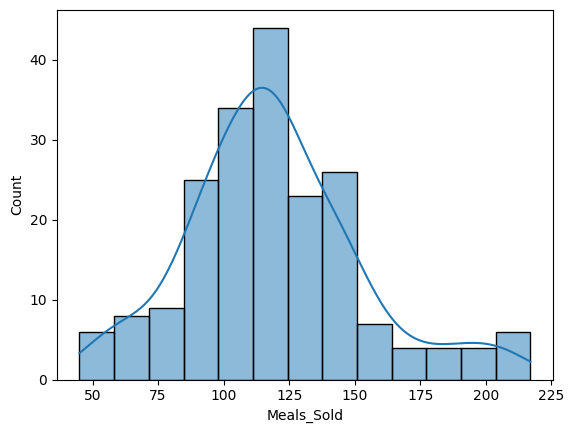

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
#Frequency count of meals served each daytplot(load_data['Meals_Sold'])
sns.histplot(load_data['Meals_Sold'], kde=True)
plt.show

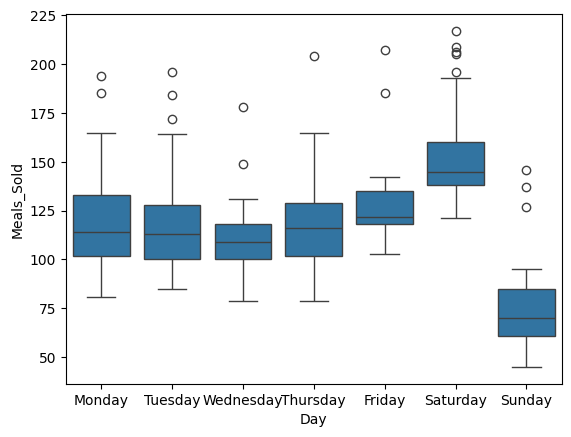

In [91]:
#Boxplot → shows the spread of values per category.

#x="Day" → days of the week on X-axis.

#y="Meals_Sold" → number of meals sold on Y-axis.


sns.boxplot(x='Day',y='Meals_Sold',data=load_data)
plt.show()

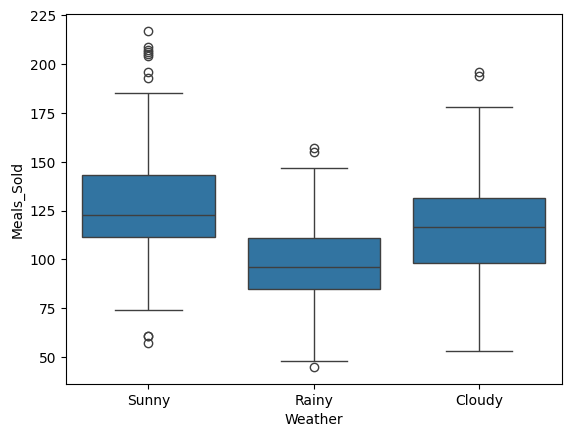

In [92]:
sns.boxplot(x='Weather',y='Meals_Sold',data=load_data)
plt.show()

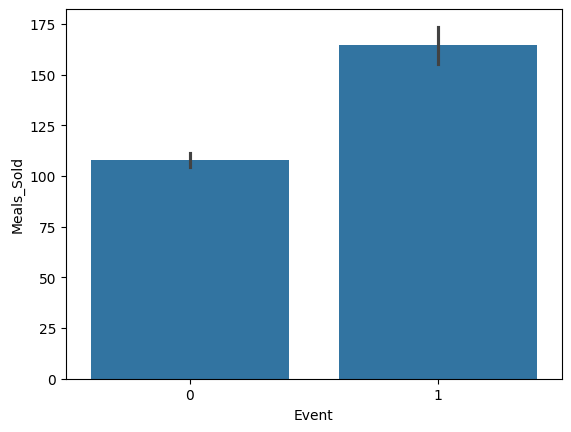

In [93]:
sns.barplot(x='Event',y='Meals_Sold',data=load_data)
plt.show()

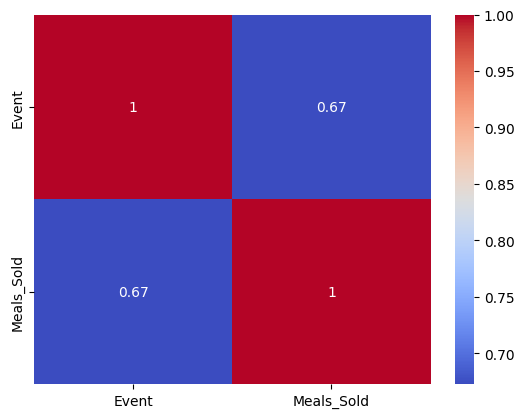

In [94]:
load_data.corr(numeric_only=True)
sns.heatmap(load_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()  

PreProcessing  Techniques   

In [95]:
# Convert the categorical columns into numerical columns using Label Encoding.
# Label Encoding assigns a unique integer to each category in a column.
# This is important because many machine learning algorithms require numerical input.
# For example, the 'Day' column might have categories like 'Monday', 'Tuesday', etc., which can be encoded as 0, 1, 2, etc.
# Similarly, the 'Weather' column with categories like 'Sunny', 'Rainy', etc., can also be encoded numerically.
from sklearn.preprocessing import LabelEncoder
ld_encode=load_data.copy()
#le=LabelEncoder()
le_day=LabelEncoder()
ld_encode['Day']=le.fit_transform(ld_encode['Day'])
le_weather=LabelEncoder()
ld_encode['Weather']=le.fit_transform(ld_encode['Weather'])
print(ld_encode.head())

         Date  Day  Weather  Event  Meals_Sold
0  2024-01-01    1        2      0         103
1  2024-01-02    5        1      0          98
2  2024-01-03    6        0      0         105
3  2024-01-04    4        0      1         165
4  2024-01-05    0        2      0         129


Feature & Target

In [96]:
x=ld_encode[['Day','Weather','Event']]
y=ld_encode['Meals_Sold']

Train Test Split

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Train shape:",x_train.shape)
print("Test shape:",x_test.shape)
print("Train shape:",y_train.shape)
print("Test shape:",y_test.shape)

Train shape: (160, 3)
Test shape: (40, 3)
Train shape: (160,)
Test shape: (40,)


Scaling

In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


Train the model using Linear Regression



In [99]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Make Prediction

In [100]:
y_pred=model.predict(x_test)

Evalution Performance

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(y_test,y_pred)  
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)

print("Root Mean Squared Error:",rmse)
print("R-squared:",r2)


Mean Absolute Error: 21.440640894440442
Mean Squared Error: 691.0256813330197
Root Mean Squared Error: 26.287367333626616
R-squared: 0.5029092887529172


Try Predictions with New Data

In [103]:
# Example: Predict meals sold for a new day with Day=2 (Wednesday), Weather=1 (Rainy), Event=0 (No event)
# You can change these values as needed

new_data = pd.DataFrame({
    'Day': [2],        # Example: Wednesday (encoded)
    'Weather': [1],    # Example: Rainy (encoded)
    'Event': [0]       # Example: No event
})

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict using the trained model
new_prediction = model.predict(new_data_scaled)
print("Predicted Meals Sold:", new_prediction[0])

Predicted Meals Sold: 109.91469835714302


Improve Model


Decission Tree

In [104]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
dt_y_pred=dt_model.predict(x_test)
dt_mae=mean_absolute_error(y_test,dt_y_pred)
dt_mse=mean_squared_error(y_test,dt_y_pred)
dt_rmse=np.sqrt(dt_mse)
print("Decision Tree Mean Absolute Error:",dt_mae)
print("Decision Tree Mean Squared Error:",dt_mse)   
print("Decision Tree Root Mean Squared Error:",dt_rmse)
print("Decision Tree R-squared:",r2_score(y_test,dt_y_pred))


Decision Tree Mean Absolute Error: 10.213958333333334
Decision Tree Mean Squared Error: 223.68154957561734
Decision Tree Root Mean Squared Error: 14.95598708128679
Decision Tree R-squared: 0.8390942282247706


Train using the Random forest

In [106]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)   
rf_y_pred=rf_model.predict(x_test)
rf_mae=mean_absolute_error(y_test,rf_y_pred)
rf_mse=mean_squared_error(y_test,rf_y_pred)
rf_rmse=np.sqrt(rf_mse)
print("Random Forest Mean Absolute Error:",rf_mae)
print("Random Forest Mean Squared Error:",rf_mse)
print("Random Forest Root Mean Squared Error:",rf_rmse)
print("Random Forest R-squared:",r2_score(y_test,rf_y_pred))


Random Forest Mean Absolute Error: 10.080876478079876
Random Forest Mean Squared Error: 215.93295160392069
Random Forest Root Mean Squared Error: 14.694657246901702
Random Forest R-squared: 0.8446681977326596


In [113]:
import joblib
joblib.dump(rf_model,'canteen_meals_predictor.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(le_day,'le_day.pkl')
joblib.dump(le_weather,'le_weather.pkl')    



['le_weather.pkl']

In [114]:
model=joblib.load("canteen_meals_predictor.pkl")
le_day=joblib.load("le_day.pkl")
le_weather=joblib.load("le_weather.pkl")

In [118]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Create and fit encoders
le_day = LabelEncoder()
le_weather = LabelEncoder()

load_data["Day"] = le_day.fit_transform(load_data["Day"])
load_data["Weather"] = le_weather.fit_transform(load_data["Weather"])

# Train your model here...
model.fit(x_train, y_train)

# Save model + encoders
joblib.dump(model, "canteen_meal_predictor.pkl")
joblib.dump(le_day, "le_day.pkl")
joblib.dump(le_weather, "le_weather.pkl")


['le_weather.pkl']